# Exploratory Data Analysis (EDA) of the _iris_ dataset in python 

 __email__: christina@lifebit.ai
 
(or create a new issue in the workshop's github repo [here](https://github.com/lifebit-ai/jax-jupyter/issues))

Before starting, let's set a selection of fav colors, to use in our plots:

In [1]:
my_palette = ['sandybrown',
              'palevioletred',
              'cornflowerblue',
              'gold',
              'tomato',
              'greenyellow',
              'palevioletred',
              'darkcyan']

# this is my palette

In [2]:
# How-to here:  http://bit.ly/jupy_display_image

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://corninaber.nl/randombits/wp-content/uploads/2017/01/species.png",  width=600, height=600 )


# Let's add a bit of interactivity:

This bit allows for light blue highlighting when hovering over tables and stuff. <br>

You can check this out in a bit, when we will be printing the __`head()`__ of a panDataFrame :).

Just hover your cursor above rows;<br>
alt rows are highlighted.



In [3]:
# This bit just allows for highlighting when hovering over tables and stuff basically
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Let's take care of dependencies: 

Make sure you have already installed the following packages:

In [4]:
## Importing dependencies:    
from sklearn import datasets # we will use iris dataset for this exercise 

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
#1.11

# Ignore warnings 


Select style to use for your upcoming plots
(I will choose `ggplot` ❤️)

In [5]:
plt.style.use('ggplot')

#To see all available style run the following command:
plt.style.available

['seaborn-colorblind',
 'seaborn-white',
 'seaborn-deep',
 'grayscale',
 'seaborn-pastel',
 'ggplot',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-talk',
 'fast',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'seaborn-notebook',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-muted',
 '_classic_test',
 'bmh',
 'fivethirtyeight',
 'seaborn',
 'seaborn-dark',
 'seaborn-poster',
 'Solarize_Light2',
 'seaborn-paper',
 'classic',
 'tableau-colorblind10']

## Now we're ready to start!

Let's choose our favorite dataset, `iris` .

In [6]:
## Accesing sklearn's datasets and Assigning dataset to the variable `iris`:

from sklearn import datasets 
iris = datasets.load_iris()

## EXPLORING OBJECT TYPE of iris dataset | w8_4_it, it's a new one;

type(iris)

sklearn.utils.Bunch

Hmm.. Well, thanks a <b>Bunch</b>!  :p

But what a <b>Bunch</b> _really_ is?

According to sklearn documentation: http://bit.ly/sklearn_dataset_iris

__BUNCH__:<br>
Dictionary-like object; the interesting attributes are: <br>
<b>‘data’</b>,          the data to learn, <br>
<b>‘target’</b>,        the classification labels, <br>
<b>‘target_names’</b>,  the meaning of the labels, <br>
<b>‘feature_names’</b>, the meaning of the features, and <br>
<b>‘DESCR’</b>,         the full description of the dataset. <br>

For more info about what a Bunch object check here: http://bit.ly/pyBunch <br>
or alt check your var explorer if working with Spyder #_ignore if you're a Command-Line Text Editor  snob :p _

Well, since a __`Bunch`__ is a  __"Dictionary-like object"__, let's check its __`.keys()`__ :

In [7]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


## Let's check the DESCR:

One of the __`.keys()`__ is named `DESCR`, no wild guesses needed to figure out what this's about:

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Plenty of info for the iris dataset. Now let's move on.

### Creating a table ready for writing to .csv from the sklearn Bunch object:

First we will combine the `data` object, that contains the numerical variables 
- `sepal length (cm)`
- `sepal width (cm)`  
- `petal length (cm)` 
- `petal width (cm)` 

with the recoded species dummy variable named 
- `target`. 

The `iris['data']` and the `iris['target']` object are both np arrays, hence we will use  `np.c_` (`numpy concatenate`) to add the two numpy arrays together, before adding it to the Pandas Dataframe. The column names called `feature_names` are stored in a list so we can use the `+` operator to add a new element, the name of the last column (`target`).


In [9]:
type(iris['data'])
type(iris['target'])
type(iris['feature_names'])


numpy.ndarray

numpy.ndarray

list

### Writing files from Pandas Dataframes

The dataframe looks great! Time to save it in a file

### Reading files from `.csv` into Pandas Dataframe

We can now read back our save `.csv` file using the pandas method `read_csv`

## Let's explore 
 ### A. The object types that hold our data,  using `type()` built-in function:

In [10]:
type(iris['data']), type(iris['target'])

(numpy.ndarray, numpy.ndarray)

### B. Their dimension using `(iris['data'].shape)`:

In [11]:
#1.34
#Our measurements for each feature live here:

iris['data'].shape, #[o]: (150,4) aka # N x m == Instances x Attributes and so on == observations x feautures,
iris['data'][:4]    #[o]: a preview of the first 4 obserevations 

((150, 4),)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

We have measurements from <br>
__150__ plants _(rows)_, for <br>
__4__ of their features. _(columns)_

### C. How their labels `(iris.target_names)` look like:

In [13]:
# Labels have an alias: 0, 1, 2, and are matched to the index of target_names
# We can see this by checking out in the variable explorer if using Spyder
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Pythonic sklearn style of objects

## Nice to meet you `X` and `y`!
For sklearn compatibility we will assign our data and target objects to __`X,y`__ respectively

# __`X`__,
- __capital EX__, almost always hosts the data values in sklearn supervised tasks , and can be either an numpy array or matrix.

# __`y`__,
- __psi__, is usually the vector with the labels, usually as `int`, and can be either an numpy array (N,) or a lists if you're like me and love your lists:) -- and turtle speed that comes with them xD

## Let's now assign our data to __`X`__ and the labels vector to __`y`__:

In [14]:
# Thus check that the X.shape[0] == y.shape[0] 
## Enough with the talking, let's proceed:
   
X = iris['data']
y = iris['target']

## Check if dimensions match:
    
X.shape[0] == y.shape[0] # If [o]: True, proceed | every plant comes with a species label

True

In [15]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
X.shape, y.shape

((150, 4), (150,))

# Meet the Pandas!

Say hello to this cool pylib!<br>
Pandas is a cool pylib that helps tidy up our data, from plain `numpy.ndarray` to a neat _R-like_ :P `DataFrame`.<br> 
Perfect for data cleaning, inspecting sparse matrices, manipulating rows and columns.<br>

Most probably obvious, but let's point out that this will make your sklearn iters a tad slower.<br>
So convert back to numpy arrays freely!


In [17]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://bit.ly/pyndas",  width=400, height=400 )

## From __`numpy.ndarray`__ into a pretty (,) tidy __`pandas.DataFrame`__: 
 

 Cool, now we have them like so in 2 objects, __`X`__ and __`y`__, perfect for sklearn.

 but let's <b>*tidy*</b> the data up a little bit,<br>
 and create a <b>pandas dataframe</b>.<br> 
 Maybe also add the column names, so we know what those 4 measurements for each flower are.

## for `sklearn` every dataset should be: N x features

Let's create the `DataFrame` with the correct orientation,<br>
- ROWS - observations
- COLUMNS - features

In [19]:
# Tidy up X in a neat Dataframe called df:
df = pd.DataFrame(data    =  X, 
                  columns = iris.feature_names)
df.head(n = 3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2

## Adding `rowNames` and `columnNames`:

For a __`pandas.Dataframe`__ an __`index`__ is what we would call a row name.

In [21]:
# http://bit.ly/pandas_DataFrame

ddf =  pd.DataFrame(data    = X, 
                    index   = iris.target,              # aka ROW NAMES!
                    columns = iris.feature_names, 
                    dtype   = None, 
                    copy    = False)
ddf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
0                4.9               3.0                1.4               0.2
0                4.7               3.2                1.3               0.2
0                4.6               3.1                1.5               0.2
0                5.0               3.6                1.4               0.2

Above, we have changed the index from __`0`__,1,2,3,4 .. to the correspondind label {0,1,2}.<br>
But this isn't the most convenient thing to do.<br>
It would be better if we could add an extra column, <br>to hold the labels of each observation in the same row.<br>
We can do that by using the __`pandas.Series()`__ functionality.

# Augmented Dataset w/ Labels: 
Add an extra column with `pd.Series()` 


### Creating a list with iris subspecies names:

Using a the <b>y</b> vector to create a list named <b>y_labs</b>, <br>
with __`len(y_labs) = df.shape[0]`__, <br>
but instead of the label alias, <b>0,1,2</b> <br>
we will have the actual names, <b>setosa, versicolor, virginica</b>

Yes, this is  __`  m e m o r y  `__  abuse but chill, it's just a tutorial m8!<br>
We will use this label list, and add it as an extra column to the __`d f`__.

### Let's add a label column to `df`:


In [21]:
# Loop over y, and replace y's 0,1,2 with iris.target_names[0] or [1] or [2] in y_labs for setose, virginica, versicolor respectively.
y_labs = [iris.target_names[i] for i in list(y)]
y_labs[:5], len(y_labs) == df.shape[0]

(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], True)

In [22]:
type(df)

pandas.core.frame.DataFrame

# From `list` to compatible-for-concatenation `pandas.Series`:

Before adding the list of a labels as a dataframe column in the dataframe,<br>
we will convert it from __`list`__ to __`pandas.Series`__

### But what is that `pandas.Series` now?? Bring `help()`!

In [23]:
## Comment out the following in case of an emergency (not really :P)

# help (pd.Series)

In [24]:
# Tack always knows best: http://bit.ly/add_column_PanDataFrame 
se = pd.Series(y_labs)
lab_df = df 
lab_df['species'] = se.values

#Let's print the updated, augmented DataFrame:
lab_df.tail()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica

## Reading and writing files

Unfortunately, most datasets don't come in a tidy `bunch` format. So let's practice with more realistics examples. We will  use the dataframe of the `iris` dataset we already loaded from `sklearn`, to write it in a `.csv` file. Subsequently, we will read this `.csv` file into a Pandas Dataframe as we would typically do with a file generated from our analyses. Then, we will continue exploring the dataset.

In [25]:
lab_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [26]:
type(lab_df)
lab_df.to_csv(path_or_buf = "iris.csv", #filename, could be full path
               sep    = ",", 
               header = True, # write column names
               index  = False # DO NOT write row names
              ) 

# This will write a file named iris.csv

pandas.core.frame.DataFrame

In [27]:
iris_from_csv = pd.read_csv(filepath_or_buffer="iris.csv")

# Inspect the loaded dataframe:
iris_from_csv.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### Labels instead of numeric indices:
Lose the numbered index and use labels instead.<br>

In [31]:
iris_from_csv = iris_from_csv.set_index(iris_from_csv['species']) # this sets  the rownames
iris_from_csv

sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                             
setosa                   5.1               3.5                1.4   
setosa                   4.9               3.0                1.4   
setosa                   4.7               3.2                1.3   
setosa                   4.6               3.1                1.5   
setosa                   5.0               3.6                1.4   
...                      ...               ...                ...   
virginica                6.7               3.0                5.2   
virginica                6.3               2.5                5.0   
virginica                6.5               3.0                5.2   
virginica                6.2               3.4                5.4   
virginica                5.9               3.0                5.1   

           petal width (cm)    species  
species                                 
setosa                  0.2     setosa  
setosa                  0.2     setosa  
setosa                  0.2     setosa  
setosa                  0.2     setosa  
setosa                  0.2     setosa  
...                     ...        ...  
virginica               2.3  virginica  
virginica               1.9  virginica  
virginica               2.0  virginica  
virginica               2.3  virginica  
virginica               1.8  virginica  

[150 rows x 5 columns]

# `R` - like dataframe slicing in `Pandas`:

### Verbose MODE: ON,  _".. if values in column are <b><i> <font size="4", color="yellowgreen">equal</font></i></b> to.."_
"Give me the part of `lab_df` for which the value of the `lab_df['species']` column is equal to `'virginica'`"


In [33]:
# Verbose MODE: ON
# Give me the part of the lab_df for which the value of the lab_df 'species' column is equal to 'virginica'

setosa_df = lab_df[lab_df['species'] == 'setosa']
setosa_df.head(n=2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

  species  
0  setosa  
1  setosa

### Verbose MODE: ON, _".. if values in column are NOT equal to.."_
"Give me the part of `lab_df` for which the value of the `lab_df['species']` column is __NOT__ equal to `'virginica'`"


In [34]:
# Verbose MODE: ON
# Give me the part of the lab_df for which the value of the lab_df 'species' column is NOT equal to 'virginica'

NOT_virginica = lab_df[lab_df['species'] != 'virginica']
NOT_virginica.tail(n=2)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

       species  
98  versicolor  
99  versicolor

## How-to: Remove a `DataFrame` column 
__Found here: https://chrisalbon.com/python/pandas_dropping_column_and_rows.html__<br><br>
Now if you want to plot the data, slicing for excluding the _non_-numeric __`['species']`__ column, might be a hustle.

So we will __`drop`__ that one for now!<BR>
We will be using the __`DataFrame.drop()'`__ defining as arguments:<br> 
- the name of the column to delete, e.g. __`['species']`__ 
- and the __`axis=1`__.

In [36]:
#https://chrisalbon.com/python/pandas_dropping_column_and_rows.html

NOT_virginica = df.drop(['species'], axis = 1)
NOT_virginica.head(n=2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2

## Too many variables already! o_O

Ok, at some point, we will need to take a look out at all the variables that we've created along the way.<br>
__`Spyder`__ has a neat interactive __variable explorer__, but _not_ the __dashboard-y__ style,<br> 
which we very much enjoy in __Jupyter Notebooks__.<br>

So, we have to somehow find a __magic!__ trick to substitute for its functionality,<br> 
while working over here in __.ipynb__ mode.

## Magic! in `Jupy Notebook`: Variable Explorer _(kind of)_

Up until now we have created several variables, objects, containers `#younameit` that hold our data, metadata etc<br>
Aah, __`Spyder`__ 's variable explorer __O_o__, where are you..

Eh! There you are! <br>
http://bit.ly/stack_variable_xplrer_jupy <br>
or if you don't mind the lack of interactivity, try the following (hint: __` whos `__ )

In [37]:
whos

Variable           Type             Data/Info
---------------------------------------------
HTML               type             <class 'IPython.core.display.HTML'>
Image              type             <class 'IPython.core.display.Image'>
InteractiveShell   MetaHasTraits    <class 'IPython.core.inte<...>eshell.InteractiveShell'>
NOT_virginica      DataFrame             sepal length (cm)  s<...>n\n[150 rows x 4 columns]
X                  ndarray          150x4: 600 elems, type `float64`, 4800 bytes
datasets           module           <module 'sklearn.datasets<...>rn/datasets/__init__.py'>
df                 DataFrame             sepal length (cm)  s<...>n\n[150 rows x 5 columns]
iris               Bunch            {'data': array([[5.1, 3.5<...>/datasets/data/iris.csv'}
iris_from_csv      DataFrame                   sepal length (<...>n\n[150 rows x 5 columns]
lab_df             DataFrame             sepal length (cm)  s<...>n\n[150 rows x 5 columns]
my_palette         list             n=

# EDA: Exploratory Data Analysis

### i) Numerical EDA

Perfect! <br>
From __`Bunch`__ to a tidy __`DataFrame`__; success! <br>
We learned a lot about the `pandas.Dataframe` as well.

Now, let's get back to the actual content of our data and get to know them a little better;<br>
- <b> df.head()</b>, a glimpse of how the first rows of the DataFrame looks like  
- <b> df.describe()</b>, some descriptive summary stats
- <b> df.info() </b>,    a look into our N x m, dimension, #instances etc 


#### Let's print the first few rows to check out how the dataframe looks like:


In [47]:
df.head(n=2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

  species  
0  setosa  
1  setosa

In [38]:
df["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

#### Let's print some info about the dataset, eg:

- Number of instances <br>
- Type of objects <br>
- Memory usage 



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
df[:][:4]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa

# None NaNs or NAs!
### Quality control: Checkpoint 0

Check for missing or NaN values in your `DataFrame`.

In [42]:
# Not fully happy with this yet:
df.isnull().head(n=2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              False             False              False             False   
1              False             False              False             False   

   species  
0    False  
1    False

### A better hack to check for null cells: 

Found here: https://stackoverflow.com/questions/42921854/how-to-check-if-a-particular-cell-in-pandas-dataframe-isnull


In [43]:
df.notnull().head(n=2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0               True              True               True              True   
1               True              True               True              True   

   species  
0     True  
1     True

In [44]:
# https://stackoverflow.com/questions/42921854/how-to-check-if-a-particular-cell-in-pandas-dataframe-isnull
df.isnull().any().any(),   # Q: "Is there any empty cell in the DataFrame?"
df.isnull().values.any(),  # Q: "Is there any missing value?"                # FASTEEER! use %timeit and see 4yourself
df.isnull().values.sum(),  # Q: "How many missing valuess are ther?"
df.isnull().sum().sum()    # Q: "Count the total number of empty cells."


(False,)

(False,)

(0,)

0

Cool, no missing values, as expected for  <b> <font size="6", color="BA55D3">iris</font></b> .

## Let's now check out some summary stats about the data:

In [45]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

# Visual EDA:
<br>
<img src="https://i.imgflip.com/1w14pk.jpg" style="width: 50%; height: 50%" title="made at imgflip.com"/>

<br>Numerical EDA is necessary, but not very intuitive.<br>
Let's __plot__ the data and explore a little more.<br><br>

We will be using a rather cool #DataViz library, mostly used for statistics related plots, named __"`seaborn`"__.


### Quirky sns syntax found here: 
http://bit.ly/sns_quirky_syntax

### Plots for EDA:
http://bit.ly/kaggle_eda_dotpy

Before starting let's take a quick look at the dataframe

In [60]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

# a. Scatter plot
__`sns.FacetGrid`__ Documentation: http://bit.ly/sns_FacetGrid

Correlation between two features, here: `sepal length` ~ `sepal width`.

Text(0.5, 1, 'Correlation of sepal width to sepal length by species')

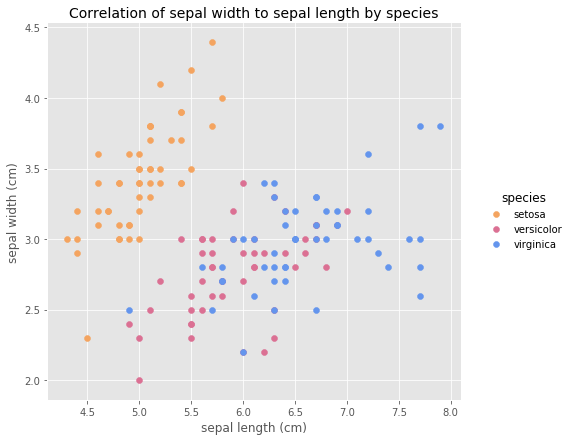

In [61]:
# Quirky sns syntax found here: http://bit.ly/sns_quirky_syntax

# We'll use seaborn's FacetGrid to color the scatterplot by species

# Be prepared - this one's slow.
import matplotlib.pyplot as plt

sns.FacetGrid(data          = df, 
              hue           = 'species', 
              height          = 6, 
              aspect        = 1.15, 
              palette       = my_palette, 
              legend_out    = True, 
              despine       = True, 
              margin_titles = True)\
    .map(plt.scatter, "sepal length (cm)", "sepal width (cm)")\
    .add_legend()\
#    .fig.suptitle('seaborn FacetGrid scatter plot for iris dataset', )
plt.title('Correlation of sepal width to sepal length by species', fontsize = 14)
plt.savefig('scatterplot_FacetGrid_iris', 
            dpi = 300, format = 'png', pad_inches=0.5)

plt.show()

# b. Boxplots
Seaborn Documentation: http://bit.ly/sns_boxplot

## • `sns.boxplot()`:

Text(0.5, 1.0, 'boxplot for iris dataset (petal length)')

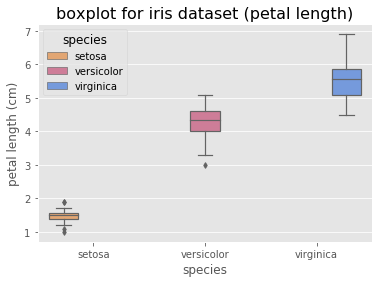

In [56]:
# We can look at an individual feature in Seaborn through a boxplot

sns.boxplot(data        = df,
            x           = 'species', 
            y           = 'petal length (cm)',
            hue         = 'species', 
            palette     = my_palette,
            saturation  = 0.75, 
            width       = 0.8, 
            fliersize   = 4, 
            linewidth   = 1.2, # how thick the box outline is
            whis        = 1.5, # 1,5 IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.            
            notch       = False)

plt.title('boxplot for iris dataset (petal length)', fontsize = 16)
plt.savefig('boxplot_iris', dpi = 300)

plt.show()


# • `sns.boxplot()` + `sns.stripplot` hybrid:

Text(0.5, 1.0, 'seaborn boxplot / stripplot hybrid plot for iris dataset')

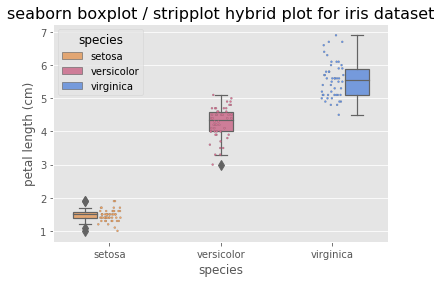

In [57]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes



ax = sns.boxplot(data        = df,
                 x           = 'species', 
                 y           = 'petal length (cm)',
                 hue         = 'species', 
                 palette     = my_palette,
                 saturation  = 0.75, 
                 width       = .65, # width of boxes or if lazy, margin L and R from boxes
                 fliersize   = 7,   # outlier symbol size | because 7 == o ari8mos tou psefti! 
                 linewidth   = 1.2, 
                 whis        = 1.5, # 1,5 IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.            
                 notch       = False)

ax = sns.stripplot(data      = df,
                   x         = 'species',
                   y         = 'petal length (cm)', 
                   jitter    = True,
                   linewidth = 0.2,
                   palette   = my_palette,
                   size      = 2,
                   edgecolor = 'gray')

#fig = plt.figure()
#fig.set_size_inches(11.7, 8.27)
plt.title('seaborn boxplot / stripplot hybrid plot for iris dataset', fontsize = 16)
plt.savefig('boxplot_stripplot_iris', dpi = 1200)

plt.show()


# • `sns.boxplot()` + `sns.swarmplot` hybrid:

Text(0.5, 1.0, 'seaborn boxplot/swarmplot for iris dataset (petal length)')

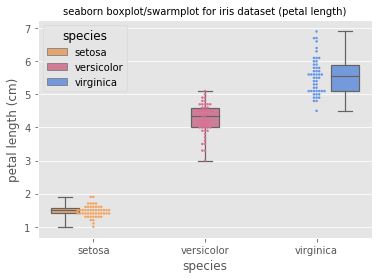

In [58]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes



ax = sns.boxplot(data        = df,
                 x           = 'species', 
                 y           = 'petal length (cm)',
                 hue         = 'species', 
                 palette     = my_palette,
                 saturation  = 0.75, 
                 width       = 0.765, 
                 fliersize   = 6, 
                 linewidth   = 1.2, 
                 whis        =  np.inf, # 1,5 IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.            
                 notch       = False)

ax = sns.swarmplot(data      = df,
                   x         = 'species',
                   y         = 'petal length (cm)',
                   palette   = my_palette,
                   size      = 2.5,
                   dodge = True)

plt.title('seaborn boxplot/swarmplot for iris dataset (petal length)', fontsize = 10)
plt.savefig('boxplot_swarmplot_iris', dpi = 300)

plt.show()

              

In [ ]:
# One way we can extend this plot is by adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes



ax = sns.boxenplot(data        = df,
                x           = 'species',
                y           = 'petal length (cm)',
                hue         = 'species', 
                palette     = my_palette,
                saturation  = 0.75, 
                width       = 0.765, 
                k_depth='proportion', 
                scale='exponential',
                linewidth=None, 
                outlier_prop=None)



ax = sns.swarmplot(data      = df,
                   x         = 'species',
                   y         = 'petal length (cm)',
                   palette   = my_palette,
                   size      = 2.5, 
                   dodge = True)

plt.title('seaborn lvplot/swarmplot for iris dataset (petal length)', fontsize = 10)
plt.savefig('boxplot_swarmplot_iris', dpi = 300)

plt.show()

              

For a detailed help message about the functions, you can call the help() method as shown below:

In [ ]:
import seaborn as sns
#help(sns.swarmplot())

# c. Violin Plots


A violin plot combines the benefits of the previous two plots and simplifies them <br>
Denser regions of the data are fatter, and sparser thiner in a violin plot


In [ ]:
import seaborn as sns

sns.violinplot(data        = df,
               x           = 'species', 
               y           = 'petal length (cm)',
               hue         = 'species', 
               palette     = my_palette,
               saturation  = 0.75, 
               width       = 0.8,
               fliersize   = 6, 
               linewidth   = 1.2, # how thick the box outline is
               whis        = 1.5, # 1,5 IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.            
               notch       = False)

    
# For exact placing, the title can be added as text:
plt.text(0.5,
         0.5,
         horizontalalignment = 'center',
         fontsize  = 10, 
         s = 5 ) 
         #transform = ax2.transAxes)

plt.title('seaborn violin plot for iris dataset (petal length)', fontsize = 10)
plt.savefig('violin_iris', dpi = 1200)

plt.show()

In [ ]:

sns.pairplot(data      = df, 
             hue       = 'species', 
             palette   = my_palette, 
             kind      = 'scatter', 
             diag_kind = 'kde', # kde
             markers   = None, 
             height    = 4, 
             aspect    = 1.6 )\
    .fig.suptitle('seaborn pairplot for iris dataset', 
                  fontsize = 18, 
                  horizontalalignment = 'center', 
                  verticalalignment = 'top',
                  y = 1.02)    #adjust title position # https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny

    
# For exact placing, the title can be added as text:
##plt.text(0.5, 1.08, figure_title,
##        horizontalalignment='center',
##         fontsize=20,
##        transform = ax2.transAxes)
plt.savefig('sns_pairplot_iris', dpi = 300)
plt.show()

# EDA, Round 2: `ggplot` in Python?!

In [ ]:
!conda config --add channels defaults
!conda config --add channels bioconda
!conda config --add channels conda-forge

!conda install -c conda-forge ggplot

In [ ]:
#ignore warnings for now
# FOR INSTALLATION INFO: http://bit.ly/ggplot_dotpy
# tl;dr:
# $ pip install ggplot | I like conda better though, so: conda install -c conda-forge ggplot
# BUT do read the manual dude

from ggplot import *

In [ ]:
help(ggplot)

# `ggplot` resources:
- ipynb scatter plot example: https://github.com/yhat/ggpy/blob/master/docs/how-to/Making%20a%20Scatter%20Plot.ipynb
- slideshare presentation: https://www.slideshare.net/Yhat/ggplot-for-python

In [ ]:
!wget  https://github.com/yhat/ggpy/blob/master/docs/how-to/Making%20a%20Scatter%20Plot.ipynb

In [ ]:
lab_df.head(n=1)
df.head(n=1)

In [ ]:
from ggplot import *
ggplot(aes(x     = 'petal length (cm)', y     = 'petal width (cm)', color = 'species'), data = df)+\
    geom_point()+\
    ggtitle("Iris scatter plot using python's ggplot!")

In [ ]:
?rpy2

In [ ]:
from rpy2 import *
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')
datasets = importr('datasets')


mtcars = datasets.data.fetch('mtcars')['mtcars']
pp = ggplot.ggplot(mtcars) + \
     ggplot.aes_string(x='wt', y='mpg', col='factor(cyl)') + \
     ggplot.geom_point() + \
        ggplot.geom_smooth(ggplot2.aes_string(group = 'cyl'),method = 'lm')
pp.plot()

In [ ]:
import pandas as pd
electives = pd.read_excel("/Users/bruno/Desktop/bioinfo_elective.xlsx", header = None)

In [ ]:
electives

In [ ]:
import numpy as np
ele = np.asmatrix(electives)

In [ ]:
ele.shape

In [ ]:
eleT = ele.T
eleT[0]

In [ ]:
eleT[1,1:]

In [ ]:
pandele = pd.DataFrame(data    = eleT[1:], 
                       columns = eleT[1:,1])


In [ ]:
pandele.info()

In [ ]:
pandele.head()

In [ ]:
pandele

In [ ]:
pandele = pa

In [ ]:
pandele = pandele.drop(['Introduction to computational neuroscience'], axis = 1)